In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data['Class'].value_counts(normalize = True)*100 #Highly imbalanced data

,proportion
Class,
0,99.827251
1,0.172749


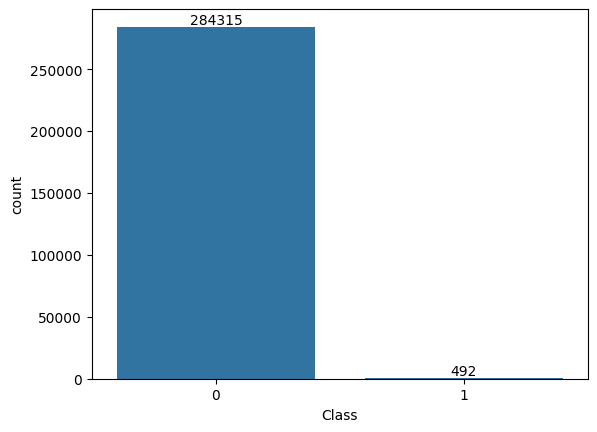

In [5]:
ax = sns.countplot(x = data['Class'])
ax.bar_label(ax.containers[0])
plt.show()

In [6]:
# data preprocessing
x = data.drop('Class',axis = 1)
y = data['Class']
# x.head()

# train test split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify = y)

In [7]:
# Distribution of data in train and test
unique_train, counts_train = np.unique(y_train, return_counts = True)
print('Proportion of class 0 in y_train data: ',round(counts_train[0]/len(y_train)*100,2),'%')
print('Proportion of class 1 in y_train data: ',round(counts_train[1]/len(y_train)*100,2),'%')
print(counts_train)
print(unique_train)

unique_test, counts_test = np.unique(y_test, return_counts = True)
print('Proportion of class 0 in y_test data: ',round(counts_test[0]/len(y_test)*100,2),'%')
print('Proportion of class 1 in y_test data: ',round(counts_test[1]/len(y_test)*100,2),'%')


Proportion of class 0 in y_train data:  99.83 %
Proportion of class 1 in y_train data:  0.17 %
[199020    344]
[0 1]
Proportion of class 0 in y_test data:  99.83 %
Proportion of class 1 in y_test data:  0.17 %


##SMOTE Oversampling

In [8]:
# SMOTE - Synthetic Minority Oversampling Technique
smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [9]:
# distribution of data in train and test wrt to target class after smote
unique_train, counts_train = np.unique(y_train, return_counts = True)
print('Sample of data in class before upsampling: ', counts_train)
print('Proportion of class 0 in y_train data: ',round(counts_train[0]/len(y_train)*100,2),'%')
print('Proportion of class 1 in y_train data: ',round(counts_train[1]/len(y_train)*100,2),'%')

unique_smote, counts_smote = np.unique(y_train_smote, return_counts = True)
print('\nSample of data in class after upsampling', counts_smote)
print('Proportion of class 0 in y_train_smote data: ',round(counts_smote[0]/len(y_train_smote)*100,2),'%')
print('Proportion of class 1 in y_train_smote data: ',round(counts_smote[1]/len(y_train_smote)*100,2),'%')

Sample of data in class before upsampling:  [199020    344]
Proportion of class 0 in y_train data:  99.83 %
Proportion of class 1 in y_train data:  0.17 %

Sample of data in class after upsampling [199020 199020]
Proportion of class 0 in y_train_smote data:  50.0 %
Proportion of class 1 in y_train_smote data:  50.0 %


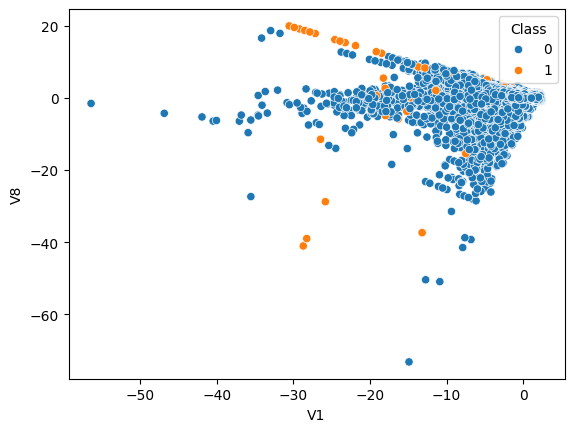

In [10]:
# Comparing V1 and V8 features wrt to target feature
sns.scatterplot(x= x_train['V1'], y = x_train['V8'],hue = y_train)
plt.show()

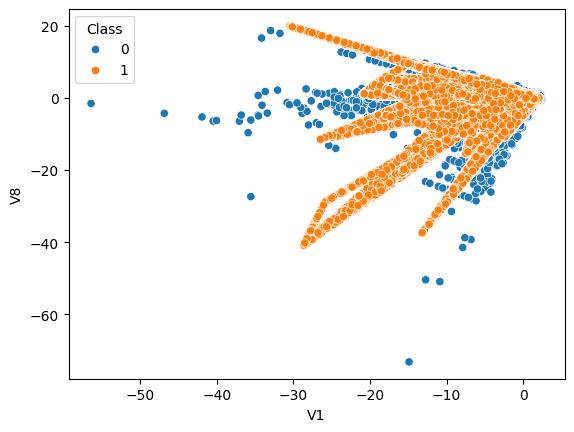

In [11]:
# comparing V1 and V8 to target after smote
sns.scatterplot(x = x_train_smote['V1'], y = x_train_smote['V8'], hue = y_train_smote)
plt.show()

##Under Sampling - Random

In [12]:
# applying the undersampler to balance the dataset
under_sampler = RandomUnderSampler(random_state = 42)
x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

In [13]:
# distribution of data in train and test wrt to target class
unique_train, counts_train = np.unique(y_train, return_counts=True)
print('Sample of data in class before downsampling:', counts_train)
print('Proportion of class 0 in y_train data:',round(counts_train[0]/len(y_train)*100 , 2), '%')
print('Proportion of class 1 in y_train data:',round(counts_train[1]/len(y_train)*100 , 2), '%')

unique_under, counts_under = np.unique(y_train_under, return_counts=True)
print('\nSample of data in class after downsampling:', counts_under)
print('Proportion of class 0 in y_train_under data:',round(counts_under[0]/len(y_train_under)*100 , 2), '%')
print('Proportion of class 1 in y_train_under data:',round(counts_under[1]/len(y_train_under)*100 , 2), '%')

Sample of data in class before downsampling: [199020    344]
Proportion of class 0 in y_train data: 99.83 %
Proportion of class 1 in y_train data: 0.17 %

Sample of data in class after downsampling: [344 344]
Proportion of class 0 in y_train_under data: 50.0 %
Proportion of class 1 in y_train_under data: 50.0 %


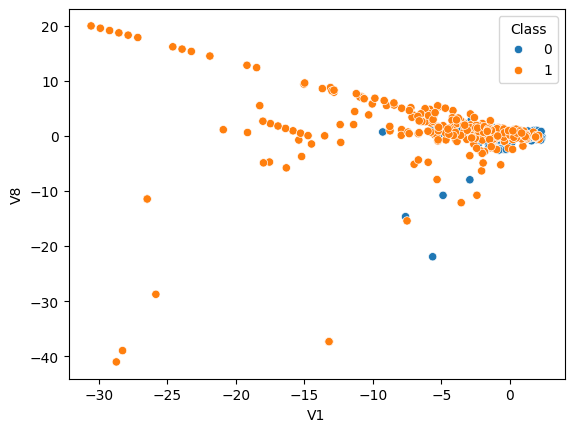

In [14]:
sns.scatterplot(x = x_train_under['V1'], y= x_train_under['V8'],hue = y_train_under)
plt.show()

#Hybrid sampling with SMOTEENN

In [15]:
# Handling class imblance

# SMOTEENN- Synthetic Minority Oversampling TEchnique Edited Nearest Neighbours

# # Apply SMOTE followed by ENN
# smote_enn = SMOTEENN(random_state=42, n_jobs=-1)
# x_train_combined, y_train_combined = smote_enn.fit_resample(x_train, y_train)

# # converting the output into data frame
# x_train_combined = pd.DataFrame(x_train_combined)

In [16]:
# Proportion of data before and after hybrid sampling
# unique_train, counts_train = np.unique(y_train, return_counts=True)
# print('Sample of data in class before hybrid sampling:',counts_train)
# print('Proportion of class 0 in y_train data:', round(counts_train[0]/len(y_train)*100, 2),'%')
# print('Proportion of class 1 in y_train data:', round(counts_train[1]/len(y_train)*100, 2),'%')

# unique_combined, counts_combined = np.unique(y_train_combined, return_counts=True)
# print('\nSample of data in class after downsampling:',counts_combined)
# print('Proportion of class 0 in y_train_smote data:', round(counts_combined[0]/len(y_train_combined)*100, 2),'%')
# print('Proportion of class 1 in y_train_smote data:', round(counts_combined[1]/len(y_train_combined)*100, 2),'%')

##Comparing Sampling Techniques

In [17]:
# without sampling
simple_model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
simple_model = simple_model.fit(x_train, y_train)

# with SMOTE
model_smote = DecisionTreeClassifier(max_depth = 6, random_state = 42)
model_smote = model_smote.fit(x_train_smote, y_train_smote)

# with RandomUnderSampler
model_under = DecisionTreeClassifier(max_depth = 6, random_state = 42)
model_under = model_under.fit(x_train_under, y_train_under)

In [18]:
# training score of all models
print('Simple model training score:', round(simple_model.score(x_train, y_train)*100,2), '%')
print('SMOTE model training score:', round(model_smote.score(x_train_smote, y_train_smote)*100,2), '%')
print('Udersampled model training score:', round(model_under.score(x_train_under, y_train_under)*100,2), '%')

Simple model training score: 99.97 %
SMOTE model training score: 98.16 %
Udersampled model training score: 99.71 %


In [19]:
# prediction of the simple model
y_pred_simple = simple_model.predict(x_test)

# prediction of the smote model
y_pred_smote = model_smote.predict(x_test)

# prediction of the under sampled model
y_pred_under = model_under.predict(x_test)

Simple model training accuracy: 99.95 %
Simple model Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.76      0.83       148

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



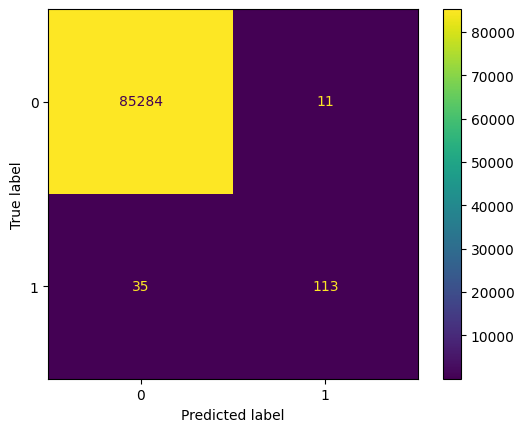

In [20]:
# classification report and confusion matrix for the simple model
cm_simple = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_simple)
print('Simple model training accuracy:', round(accuracy_score(y_test, y_pred_simple)*100,2), '%')
print('Simple model Classification Report:\n\n', classification_report(y_test, y_pred_simple))

SMOTE testing accuracy: 98.1 %
SMOTE Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.83      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.56     85443
weighted avg       1.00      0.98      0.99     85443



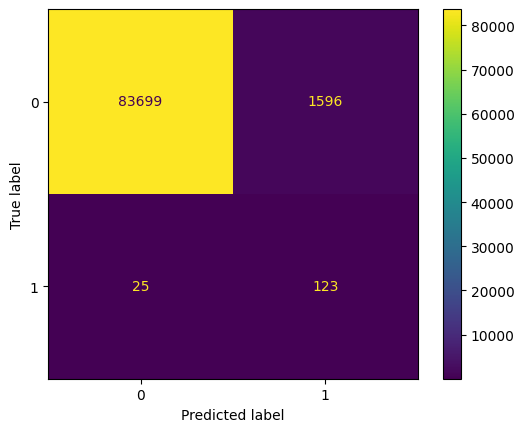

In [21]:
# Classification report and confusion matrix for SMOTE model
cm_smote = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote)
print('SMOTE testing accuracy:', round(accuracy_score(y_test, y_pred_smote)*100, 2), '%')
print('SMOTE Classification Report:\n\n', classification_report(y_test, y_pred_smote))

Under sampled model testing accuracy: 89.05 %
Under sampled model Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.89      0.94     85295
           1       0.01      0.90      0.03       148

    accuracy                           0.89     85443
   macro avg       0.51      0.89      0.48     85443
weighted avg       1.00      0.89      0.94     85443



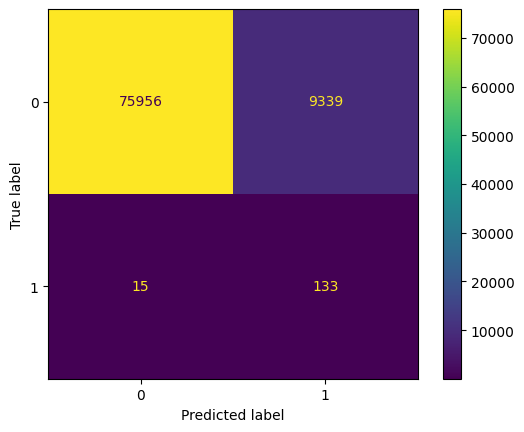

In [22]:
# Classification report and confusion matrix for under sampled model
cm_under = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_under)
print('Under sampled model testing accuracy:', round(accuracy_score(y_test, y_pred_under)*100, 2), '%')
print('Under sampled model Classification Report:\n\n', classification_report(y_test, y_pred_under))